#  Bagging and Random Forest

In [1]:
#Import libraries
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline


# Classification

## Loading MNIST data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [8]:
#Flattening 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

 #Normalising
X_train = X_train/255
X_test = X_test/255

In [9]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [11]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

## Some helper functions

In [12]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(estimator, X_train, y_train, cv = cv, scoring='f1_macro')

    print(f"On an average, {name} model has f1 score of " 
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

In [13]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print("# Classification report")
    print(classification_report(y_test, y_pred))

    print("# Confusion matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

## Decision trees for MNIST multiclass classification

In [14]:
decision_tree_pipeline = Pipeline([("classifier", DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")

On an average, decision tree model has f1 score of 0.867 +/- 0.004 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.87      0.87       982
           5       0.83      0.84      0.83       892
           6       0.88      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix


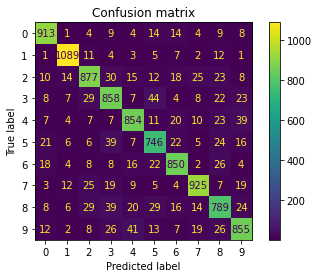

In [15]:
eval(decision_tree_pipeline, X_test, y_test)

## MNIST classification with bagging

In [16]:
bagging_pipeline = Pipeline([("Classifier", BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, "bagging")

On an average, bagging model has f1 score of 0.938 +/- 0.002 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.92      0.93       892
           6       0.97      0.95      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.93      0.91      0.92       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

# Confusion matrix


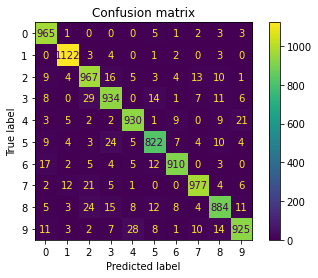

In [17]:
eval(bagging_pipeline, X_test, y_test)

## Random forest 

In [18]:
rf_pipeline = Pipeline([("classifier", RandomForestClassifier())])
train_classifiers(rf_pipeline, X_train, y_train.ravel(), cv, "bagging")

On an average, bagging model has f1 score of 0.967 +/- 0.001 on the training set.


In [15]:
eval(rf_pipeline, X_test, y_test)

NameError: name 'rf_pipeline' is not defined

# Regression

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from sklearn.model_selection import cross_validate, train_test_split, RandomizedSearchCV, ShuffleSplit
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor

In [ ]:
np.random.seed(306)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y = True)
labels *= 100

com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

train_features, dev_features, train_labels, dev_labels =  train_test_split(com_train_features, com_train_labels, random_state=42)


### Some helper functions

In [ ]:
def train_regressor(estimator, X_train, y_train, cv, name):
    cv_results = cross_validate(estimator,
                                 X_train,
                                y_train,
                                cv=cv, 
                                scoring="neg_mean_absolute_error",
                                return_train_score=True,
                                return_estimator=True)

    cv_train_error = -1*cv_results['train_score']
    cv_test_error = -1*cv_results['test_score']

    print(f"On an average, {name} makes an error of " 
            f"{cv_train_error.mean():.3f}k +/- {cv_train_error.std():.3f}k on the training set.")

    print(f"On an average, {name} makes an error of " 
            f"{cv_test_error.mean():.3f}k +/- {cv_test_error.std():.3f}k on the training set.")

### Decision tree regressor

In [16]:
train_regressor(DecisionTreeRegressor(), com_train_features, com_train_labels, cv, 'decision tree regressor')

On an average, decision tree regressor makes an error of 0.000k +/- 0.000k on the training set.
On an average, decision tree regressor makes an error of 47.330k +/- 1.220k on the training set.


### Bagging regressor

In [20]:
train_regressor(BaggingRegressor(), com_train_features, com_train_labels, cv, 'bagging regressor')

On an average, bagging regressor makes an error of 14.428k +/- 0.181k on the training set.
On an average, bagging regressor makes an error of 35.298k +/- 0.769k on the training set.


### RandomForest Regressor

In [21]:
train_regressor(RandomForestRegressor(), com_train_features, com_train_labels, cv, 'random forest regressor')

On an average, random forest regressor makes an error of 12.629k +/- 0.049k on the training set.
On an average, random forest regressor makes an error of 33.273k +/- 0.712k on the training set.


### Parameter search for random forest regressor

In [28]:
parameter_distributions = {"n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500], "max_leaf_nodes": [2, 5, 10, 20, 50, 100] }

search_cv = RandomizedSearchCV(RandomForestRegressor(n_jobs=2), 
                                param_distributions=parameter_distributions,
                                scoring="neg_mean_absolute_error", n_iter=10,
                                random_state=0, n_jobs=2,)

search_cv.fit(com_train_features, com_train_labels)

columns = [f"param_{name}" for name in parameter_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = -cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,mean_test_error,std_test_error
0,500,100,40.569942,-0.728845
2,10,100,40.942897,-1.171675
7,100,50,43.831590,-0.798558
8,1,100,47.343692,-0.543380
6,50,20,49.485812,-0.851706
1,100,20,49.508989,-1.071598
9,10,20,50.023451,-1.290916
3,500,10,55.043334,-1.042763
4,5,5,61.615382,-1.062798
5,5,2,73.487236,-1.106120


In [29]:
error = -search_cv.score(test_features, test_labels)
print(f"On average, our random forest regressor makes an error of {error:.2f}k$")

On average, our random forest regressor makes an error of 40.27k$
